# 1. 결정 트리 알고리즘 및 지니 계수

## 1-1. ㄱ)과 ㄴ)에 들어갈 말을 쓰시오.
결정 트리 알고리즘은 균일도를 기반으로 하는 알고리즘으로 쉽고 직관적이라는 장점이 있습니다. 
하지만 균일도가 다양할수록 트리는 복잡해지고, model이 train data에 너무 잘 맞는 (ㄱ) 문제가 발생합니다.
따라서 (ㄴ)을 조정하여 (ㄱ) 문제를 해결 할 수 있습니다.


답: (ㄱ) 과대적합 (ㄴ) 하이퍼파라미터

## 1-2 N1과 N2의 지니 계수를 바탕으로 N의 지니 계수를 계산하시오. (code없이 계산기로 계산하셔도 됩니다.)
참고. parent 노드에서 N1과 N2 노드로 나누어지는 구조입니다.
 
        Parent |	N1	 |  N2
    C1     4   |	3	  |  1
    C2     6   |	2	  |  4


In [1]:
Gini_n1 = 1-(3/5)**2-(2/5)**2
Gini_n1

0.48

In [2]:
Gini_n2 = 1-(1/5)**2-(4/5)**2
Gini_n2

0.31999999999999984

In [3]:
Gini = 5/10 * Gini_n1 + 5/10 * Gini_n2
Gini

0.3999999999999999

# 2. 엔트로피 복습문제

## 2-1. 다음 빈칸의 답을 각주로 달아주세요.

엔트로피란 ( ㉠ )를 정량화하여 표현한 값이다. 
어떤 집합의 엔트로피가 높을 수록 그 집단의 특징을 찾는 것이 어렵다. 
결정 트리의 리프 노드들은 엔트로피가 최소가 되는 방향으로 분류하는 것이 최적의 분류이다. 
( ㉡ )는 1-엔트로피로 나타내며 ( ㉡ )를 최대화하는 순서로 속성을 배치해야 한다.

답 : ㉠ 불순도 ㉡ 정보이득지수

## 2-2. 파이썬을 사용해서 엔트로피를 직접 계산해보겠습니다. 다음은 엔트로피를 계산하는 함수입니다.

from IPython.display import Image
![title](9주차_복습문제_그림.png) # markdown안에서 나오게 할 때

In [4]:
import numpy as np

def Entropy(p):
    id_p = np.where(p!=0)
    return -np.sum(p[id_p]*np.log(p[id_p]))

### 2-2-1. 분할 전 엔트로피를 계산해서 소수점 넷째 자리에서 반올림해주세요. 확률을 np.array로 정의하여 함수 안에 넣어주시면 됩니다.

### 2-2-2. 분할 후 엔트로피를 계산해서 서 소수점 넷째 자리에서 반올림해주세요.

### 2-2-3. 도출한 결과를 바탕으로 결과를 해석해주세요.

# 3.breast-cancer 데이터 셋을 활용해서 다음 지시사항에 따라 문제를 풀어주세요.

## 3-1. 데이터 셋을 활용해서 DecisionTreeClassifier로 학습해주세요!



* class열을 label로 나머지 열을 feature로 사용하시면 됩니다!

* test_size=0.3, random_state=본인 나이로 지정해주세요!

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
uci_path='http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'
df=pd.read_csv(uci_path,header=None)
df.columns=['id','clump','cell_size','cell_shape','adhesion','epithlial','bare_nuclei','chromatin','normal_nucleoli','mitoses','class']
pd.set_option('display.max_columns',15) #최대 열 개수 조정
df['bare_nuclei'].replace('?',np.nan,inplace=True)
df.dropna(subset=['bare_nuclei'],axis=0,inplace=True) #bare_nuclei 열 누락 데이터 삭제
df['bare_nuclei']=df['bare_nuclei'].astype('int') #bare_nuclei 열 정수형 전환

In [6]:
df

,id,clump,cell_size,cell_shape,adhesion,epithlial,bare_nuclei,chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [7]:
df_label = df['class']
df_features = df.drop('class',axis=1)

In [8]:
df_features.columns

Index(['id', 'clump', 'cell_size', 'cell_shape', 'adhesion', 'epithlial',
       'bare_nuclei', 'chromatin', 'normal_nucleoli', 'mitoses'],
      dtype='object')

In [9]:
df_label.value_counts()

2    444
4    239
Name: class, dtype: int64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df_features,df_label,test_size=0.3,random_state=26)
dt_clf = DecisionTreeClassifier(random_state=26)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=26)

## 3-2. 학습한 모델을 graphviz모듈로 시각화 해주세요.



* 하이퍼 파라미터는 제어하지 말아주세요!

* class_names=['2','4']로 지정해 주세요!


* impurity와 filled 속성은 True로 지정해주세요!

* 결정 트리 시각화 결과 모형에 어떤 문제점이 있는지 간단히 서술해주세요!

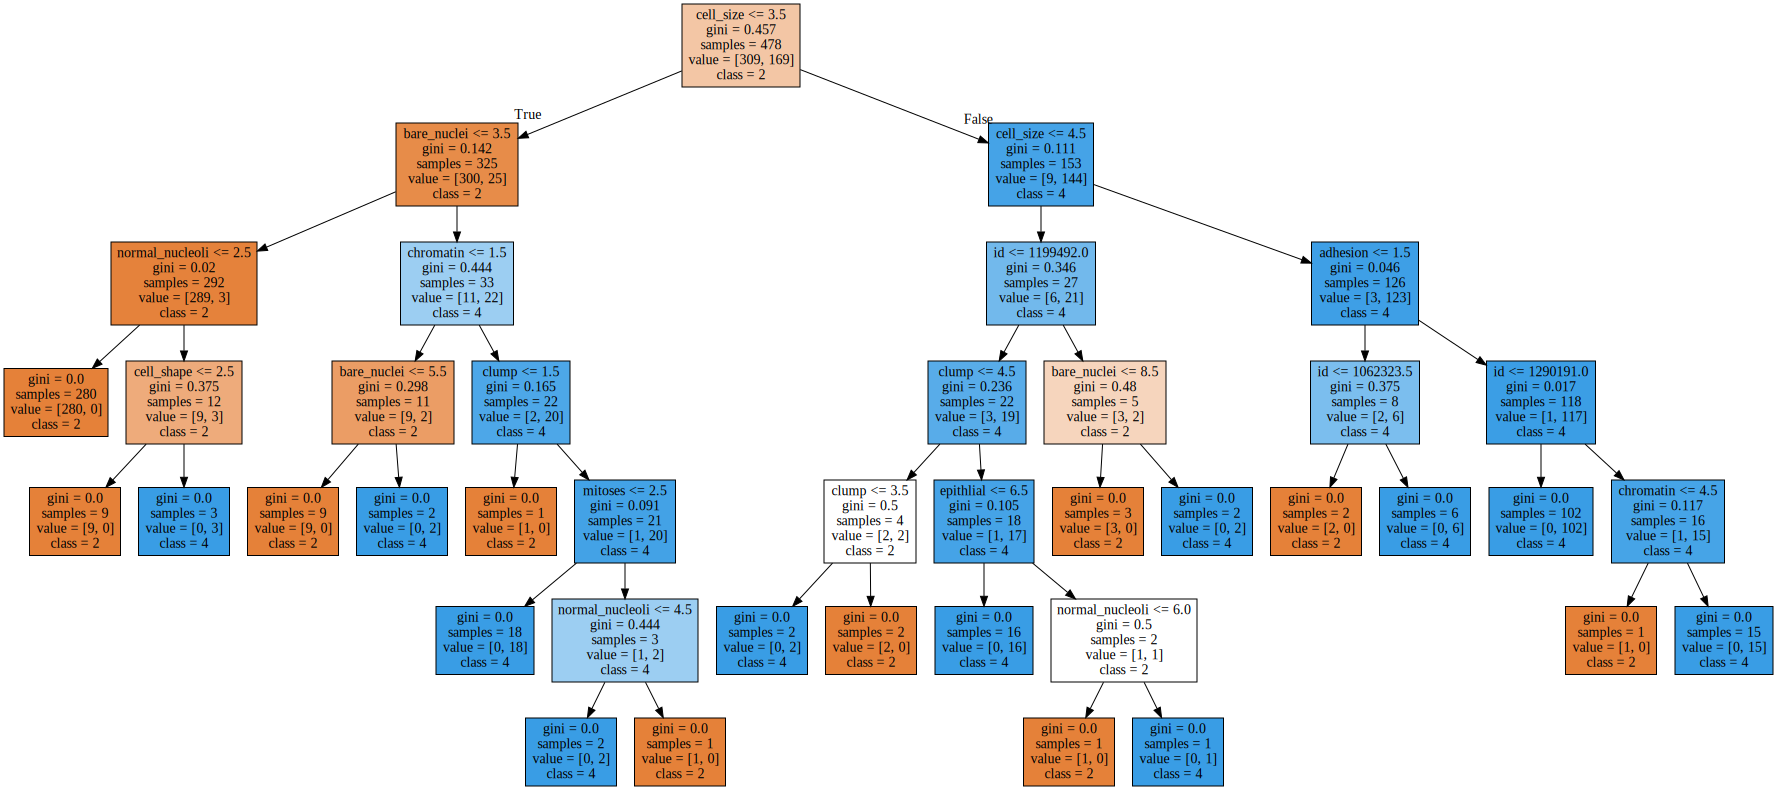

In [11]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf,
                out_file='9주차.dot',
                class_names=['2','4'],
                feature_names=df_features.columns,
               impurity=True,
               filled=True)

import graphviz
with open('9주차.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

학습데이터에 지나치게 과적합 되었습니다.

## 3-3.GridSearchCV 모듈을 활용해서 결정 트리의 최적 하이퍼 파라미터를 찾고 모델에 적용한 후 다시 결정 트리를 시각화해주세요!


* GridSeacrchCV모듈에 지정한 parameters를 사용해주세요!

* cv=3로 지정해주세요!


## 3-4. 결정트리에 사용된 피처들의 중요도를 파악해주세요!

* 각 피처들의 중요도를 열 이름과 함께 출력해주세요

* 각 피처의 중요도를 barplot을 이용해서 시각화해주세요.

In [12]:
import seaborn as sns
import numpy as np
%matplotlib inline

## 3-5. 가장 중요도가 높다고 판단되는 피처 2개를 선택하여 중요도에 따른 class의 결과값을 산점도로 나타내주세요!

* class의 분류는 색으로 판단하며, 동그라미 마크를 사용하고, edgecolor='k'로 해주세요.

# 4. 주어진  'titanic_train.csv'를 GraphViz를 이용하여 결정트리의 규칙을 시각해주세요. 그리고 결정트리 생성에 미친 피처의 중요도를 막대그래프로 나타내주세요!

* Survived 속성을 클래스 결정값 데이터 세트로 설정해주세요.

* 피처는 문자 type의 열은 제외한다.

* test data는 전체 데이터의 20%로 지정합니다.

* 과적합 방지를 위해 적절한 max_depth를 사용해주세요.

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
import pandas as pd
import numpy as np
titanic=pd.read_csv('titanic_train.csv')